In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [5]:
# Load the diamonds dataset
diamonds = pd.read_excel('/Users/lisalusinga/Desktop/YEAR 1 SEM 2/PROBABILITY & STATISTICS/hypothesis_work/diamonds_new.xlsx')
diamonds.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [16]:
#calculating the mean
mean_price=diamonds['price'].mean()
print(f"Mean price of the full dataset is {mean_price:.1f}")

Mean price of the full dataset is 3933.5


In [29]:
#calculating the standard deviation
standard_dev=diamonds['price'].std()
print(f"The standard deviation of price is {standard_dev}")

The standard deviation of price is 3989.963676930876


In [ ]:
# Parameters
null = 3933.5         # Null hypothesis mean price
sd = diamonds['price'].std()  # Standard deviation from the dataset
n = 30              # Sample size
alpha = 0.05        # Significance level (Type I error rate)
num_simulations = 10000  # Number of simulations

# Function to simulate Type I error (null hypothesis is true)
def simulate_type_1_error():
    p_values = []
    for _ in range(num_simulations):
        # Simulate sample under null hypothesis: mean = null hypothesis, using dataset's standard deviation
        sample = np.random.normal(null, sd, n)
        t_stat, p_val = stats.ttest_1samp(sample, null)
        p_values.append(p_val)
    
    # Type I error: Reject null hypothesis when it’s true (p < alpha)
    type_1_errors = np.sum(np.array(p_values) < alpha)
    return type_1_errors / num_simulations

# Run simulation
type_1_rate = simulate_type_1_error()

# Print result
print(f"Null Hypothesis: {null}")
print(f"Simulated Type I Error Rate (alpha): {type_1_rate} (Expected: {alpha})")

Null Hypothesis: 3933.5
Simulated Type I Error Rate (alpha): 0.0501 (Expected: 0.05)


In [32]:
# Testing on a real sample from the dataset
sample = diamonds['price'].sample(n, random_state=42)
sample_mean = sample.mean()
t_stat, p_val = stats.ttest_1samp(sample, null)
print(f"Actual sample test: Sample Mean = ${sample_mean:.1f}, t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
if p_val < alpha:
    print("Reject H₀: The sample mean significantly differs from 3933.5")
else:
    print("Fail to reject H₀: No significant difference from 3933.5")

Actual sample test: Sample Mean = $3529.4, t-statistic = -0.584, p-value = 0.564
Fail to reject H₀: No significant difference from 3933.5


- Since we did  not reject the null hypothesis, there is no type 1 error here. This means the p_value of 0.564 is in the 95% where we correctly do not reject the null hypothesis.

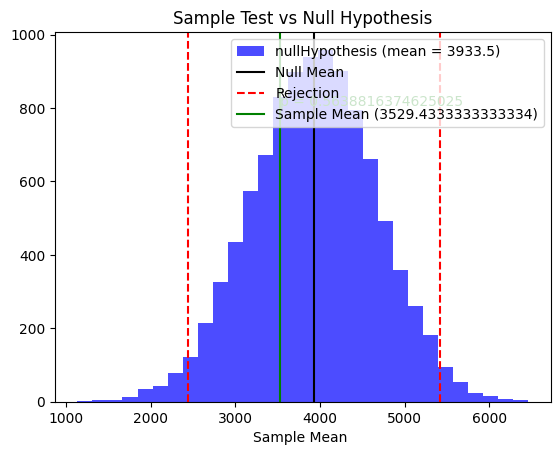

'\nWe used axvline which represents axis vertical line for adding vertical lines at specified x-coordinates for things like critical values and boundaries\n'

In [35]:
# Generate null distribution (sample means under H₀)
null_dist = np.random.normal(null, sd / np.sqrt(n), 10000)

# Critical values (two-tailed)
critical_value = stats.t.ppf(1 - alpha/2, df=n-1) * (sd / np.sqrt(n))
#we calculate the critical values with stats.t.ppf to show the rejection regions for alpha=0.05

plt.hist(null_dist, bins=30, color="blue", alpha=0.7, label="nullHypothesis (mean = 3933.5)")
plt.axvline(null, color="black", label="Null Mean")
plt.axvline(null - critical_value, color="red", linestyle="--", label="Rejection")
plt.axvline(null + critical_value, color="red", linestyle="--")
plt.axvline(sample_mean, color="green", label=f"Sample Mean ({sample_mean})")
plt.text(sample_mean, plt.ylim()[1] * 0.8, f"p = {p_val}", color="green")
plt.title("Sample Test vs Null Hypothesis")
plt.xlabel("Sample Mean ")
plt.legend()
plt.show()

"""
We used axvline which represents axis vertical line for adding vertical lines at specified x-coordinates for things like critical values and boundaries
"""

# TYPE 2 ERROR

In [50]:
# Parameters
Null = 3933.5                    # Null hypothesis mean (your full dataset mean)
altern = 4500                      # Alternative mean (arbitrary, adjust as needed)
Sd = diamonds['price'].std()  # Standard deviation (~3989.4)
n = 30                           # Sample size
alpha = 0.05                     # Significance level
num_simulations = 10000          # Number of simulations

# Function to simulate Type II error (H₀ false)
def simulate_type_2_error():
    p_values = []
    for _ in range(num_simulations):
        # Simulate sample under H₁: mean = mu_1 (assuming true mean isn’t $3933.5)
        sample = np.random.normal(Null, Sd, n)
        t_stat, p_val = stats.ttest_1samp(sample, altern)
        p_values.append(p_val)
    
    # Type II error: Fail to reject H₀ when it’s false (p >= alpha)
    type_2_errors = np.sum(np.array(p_values) >= alpha)
    return type_2_errors / num_simulations

# Run simulation
type_2_rate = simulate_type_2_error()

# Print result
print(f"Null Hypothesis Mean : {Null:.1f}")
print(f"Alternative Hypothesis Mean : {altern:.1f}")
print(f"Simulated Type II Error Rate (beta): {type_2_rate:.3f}")
print(f"Power of the test (1-beta):{1- type_2_rate:.3f}")

Null Hypothesis Mean : 3933.5
Alternative Hypothesis Mean : 4500.0
Simulated Type II Error Rate (beta): 0.885
Power of the test (1-beta):0.115


In [53]:
stand=diamonds['price'].std()
print(stand)

3989.963676930876


In [51]:
# Test a real sample from the dataset (for comparison)
Sample = diamonds['price'].sample(n, random_state=42)
Sample_mean = Sample.mean()
t_stat, p_val = stats.ttest_1samp(sample, Null)
print(f"Actual sample test: Sample Mean = ${sample_mean:.1f}, t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
if p_val < alpha:
    print("Reject null hypothesis: The sample mean significantly differs from 3933.5")
else:
    print("Fail to reject null hypothesis: No significant difference from 3933.5")

Actual sample test: Sample Mean = $3529.4, t-statistic = -0.584, p-value = 0.564
Fail to reject null hypothesis: No significant difference from 3933.5


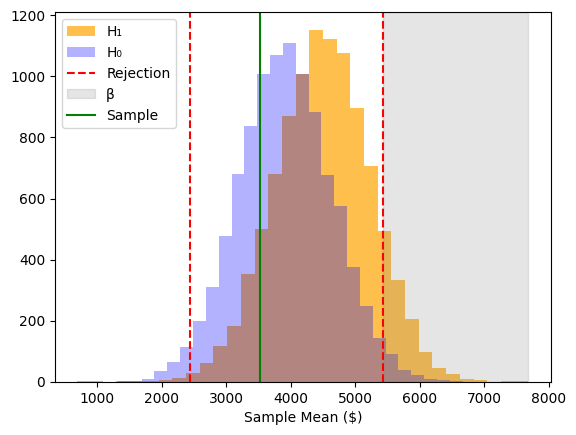

In [55]:
null_dist = np.random.normal(Null, stand / np.sqrt(n), 10000)
alt_dist = np.random.normal(altern, stand / np.sqrt(n), 10000)

# Critical value
critical_value = stats.t.ppf(1 - alpha/2, df=n-1) * (stand / np.sqrt(n))

# Plot
plt.hist(alt_dist, bins=30, color="orange", alpha=0.7, label="H₁")
plt.hist(null_dist, bins=30, color="blue", alpha=0.3, label="H₀")
plt.axvline(Null + critical_value, color="red", linestyle="--", label="Rejection")
plt.axvline(Null - critical_value, color="red", linestyle="--")
plt.axvspan(Null + critical_value, max(alt_dist), color="gray", alpha=0.2, label="β")  # Fixed syntax and range
plt.axvline(sample_mean, color="green", label="Sample")
plt.xlabel("Sample Mean ($)")
plt.legend()
plt.show()

- Type 2 error using a higher aternate hypothesis mean

In [56]:
#Using a diffrenet alternate hypothesis.
# Parameters
Null = 3933.5                    # Null hypothesis mean (your full dataset mean)
altern = 8500                      # Alternative mean (arbitrary, adjust as needed)
Sd = diamonds['price'].std()  # Standard deviation (~3989.4)
n = 30                           # Sample size
alpha = 0.05                     # Significance level
num_simulations = 10000          # Number of simulations

# Function to simulate Type II error (H₀ false)
def simulate_type_2_error():
    p_values = []
    for _ in range(num_simulations):
        # Simulate sample under H₁: mean = mu_1 (assuming true mean isn’t $3933.5)
        sample = np.random.normal(Null, Sd, n)
        t_stat, p_val = stats.ttest_1samp(sample, altern)
        p_values.append(p_val)
    
    # Type II error: Fail to reject H₀ when it’s false (p >= alpha)
    type_2_errors = np.sum(np.array(p_values) >= alpha)
    return type_2_errors / num_simulations

# Run simulation
type_2_rate = simulate_type_2_error()

# Print result
print(f"Null Hypothesis Mean : {Null:.1f}")
print(f"Alternative Hypothesis Mean : {altern:.1f}")
print(f"Simulated Type II Error Rate (beta): {type_2_rate:.3f}")
print(f"Power of the test (1-beta):{1- type_2_rate:.3f}")

Null Hypothesis Mean : 3933.5
Alternative Hypothesis Mean : 8500.0
Simulated Type II Error Rate (beta): 0.000
Power of the test (1-beta):1.000


In [57]:
# Test a real sample from the dataset (for comparison)
Sample = diamonds['price'].sample(n, random_state=42)
Sample_mean = Sample.mean()
t_stat, p_val = stats.ttest_1samp(sample, Null)
print(f"Actual sample test: Sample Mean = ${sample_mean:.1f}, t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
if p_val < alpha:
    print("Reject null hypothesis: The sample mean significantly differs from 3933.5")
else:
    print("Fail to reject null hypothesis: No significant difference from 3933.5")

Actual sample test: Sample Mean = $3529.4, t-statistic = -0.584, p-value = 0.564
Fail to reject null hypothesis: No significant difference from 3933.5


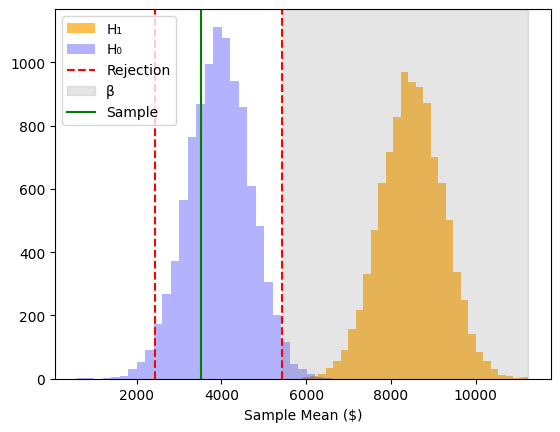

In [59]:
null_dist = np.random.normal(Null, Sd / np.sqrt(n), 10000)
alt_dist = np.random.normal(altern, Sd / np.sqrt(n), 10000)

# Critical value
critical_value = stats.t.ppf(1 - alpha/2, df=n-1) * (Sd / np.sqrt(n))

# Plot
plt.hist(alt_dist, bins=30, color="orange", alpha=0.7, label="H₁")
plt.hist(null_dist, bins=30, color="blue", alpha=0.3, label="H₀")
plt.axvline(Null + critical_value, color="red", linestyle="--", label="Rejection")
plt.axvline(Null - critical_value, color="red", linestyle="--")
plt.axvspan(Null + critical_value, max(alt_dist), color="gray", alpha=0.2, label="β")  # Fixed syntax and range
plt.axvline(Sample_mean, color="green", label="Sample")
plt.xlabel("Sample Mean ($)")
plt.legend()
plt.show()